In [ ]:
from google.colab import files
upload = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('heart.csv', header=0)

In [ ]:
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
le = LabelEncoder()
df['famhist'] = le.fit_transform(df['famhist'])

In [ ]:
y = df['chd']
x = df.drop(['chd'], axis=1).drop(['row.names'], axis = 1)

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [ ]:
reg = l1_l2(l1=0.1, l2=0.1)

In [ ]:
model = Sequential([
            Input(shape=(9,)),
            Dense(64, kernel_initializer=GlorotNormal ,activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid', kernel_regularizer=reg)
])

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 64)                640       
_________________________________________________________________
dense_116 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_117 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_118 (Dense)            (None, 9)                 153       
Total params: 3,401
Trainable params: 3,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.optimizers import Adam
from tensorflow.keras import Input
from keras.metrics import categorical_crossentropy
from keras.initializers import GlorotNormal
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.regularizers import l1_l2

In [ ]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, batch_size=32, validation_split=.1 ,epochs=50, verbose=2)

Epoch 1/50
11/11 - 1s - loss: 1.2298 - accuracy: 0.6325 - val_loss: 1.0119 - val_accuracy: 0.6486
Epoch 2/50
11/11 - 0s - loss: 0.8610 - accuracy: 0.6867 - val_loss: 0.7658 - val_accuracy: 0.7838
Epoch 3/50
11/11 - 0s - loss: 0.6789 - accuracy: 0.7410 - val_loss: 0.6216 - val_accuracy: 0.7838
Epoch 4/50
11/11 - 0s - loss: 0.5911 - accuracy: 0.7590 - val_loss: 0.5819 - val_accuracy: 0.8108
Epoch 5/50
11/11 - 0s - loss: 0.5549 - accuracy: 0.7560 - val_loss: 0.5608 - val_accuracy: 0.7838
Epoch 6/50
11/11 - 0s - loss: 0.5442 - accuracy: 0.7410 - val_loss: 0.5493 - val_accuracy: 0.8108
Epoch 7/50
11/11 - 0s - loss: 0.5495 - accuracy: 0.7410 - val_loss: 0.5331 - val_accuracy: 0.8108
Epoch 8/50
11/11 - 0s - loss: 0.5408 - accuracy: 0.7500 - val_loss: 0.5381 - val_accuracy: 0.8108
Epoch 9/50
11/11 - 0s - loss: 0.5324 - accuracy: 0.7560 - val_loss: 0.5356 - val_accuracy: 0.8108
Epoch 10/50
11/11 - 0s - loss: 0.5246 - accuracy: 0.7500 - val_loss: 0.5244 - val_accuracy: 0.7838
Epoch 11/50
11/11 -

In [ ]:
model.evaluate(xtest,ytest,batch_size=10 ,verbose=0)

[0.6954163312911987, 0.7311828136444092]

In [ ]:
xtest.shape

(93, 9)

In [ ]:
predictions = model.predict_classes(xtest, batch_size=10, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
cm = confusion_matrix(ytest, predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[45 16]
 [ 9 23]]


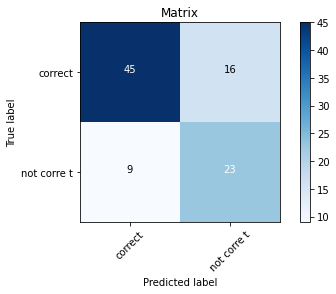

In [ ]:
labels = ['correct', 'not corre t']

plot_confusion_matrix(cm, labels, title='Matrix' )